In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import cv2
import numpy as np
from PIL import Image
import os

In [2]:
# Image dimensions in dataset:
# 200x200x3

dataset_folder = "C:/Users/aaady/Desktop/Mira/Neural Networks, AI, Machine Learning/Datasets/kindgirls_faces/normalized_images"
test_folder = "C:/Users/aaady/Desktop/Mira/Neural Networks, AI, Machine Learning/Projects/Hair color classification/testing_data_augmented"

In [3]:
# Assign photos to dataset

def load_images_to_dataset(folder):
    dataset = []
    for i, filename in enumerate(os.listdir(folder)): # "Enumerate" is a way to index in a for loop
        image = Image.open(folder + "/{}".format(filename))
        data = np.asarray(image)
        dataset.append(data)
    return dataset

In [4]:
x_train = load_images_to_dataset(dataset_folder)
x_test = load_images_to_dataset(test_folder)

x_train = np.array(x_train) # Convert dataset to numpy array
x_test = np.array(x_test) # Convert test set to numpy array

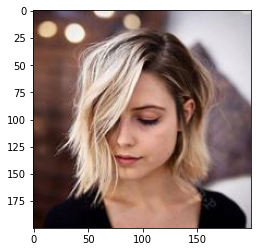

In [5]:
plt.imshow(x_test[0])
plt.show()

In [6]:
# Not sure if this is still needed:
x_train = x_train / 255.0
x_test = x_test / 255.0

In [7]:
encoder_input = keras.Input(shape=(200, 200, 3), name='img')
x = keras.layers.Flatten()(encoder_input)
encoder_output = keras.layers.Dense(400, activation='relu')(x)

encoder = keras.Model(encoder_input, encoder_output, name='encoder')

decoder_input = keras.layers.Dense(120000, activation='relu')(encoder_output) # Total number of neurons is 200*200*3 = 120 00
decoder_output = keras.layers.Reshape((200, 200, 3))(decoder_input)


opt = keras.optimizers.Adam(lr=0.001, decay=1e-6)

autoencoder = keras.Model(encoder_input, decoder_output, name='autoencoder')
autoencoder.summary()

Model: "autoencoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
img (InputLayer)             [(None, 200, 200, 3)]     0         
_________________________________________________________________
flatten (Flatten)            (None, 120000)            0         
_________________________________________________________________
dense (Dense)                (None, 400)               48000400  
_________________________________________________________________
dense_1 (Dense)              (None, 120000)            48120000  
_________________________________________________________________
reshape (Reshape)            (None, 200, 200, 3)       0         
Total params: 96,120,400
Trainable params: 96,120,400
Non-trainable params: 0
_________________________________________________________________


In [8]:
autoencoder.compile(opt, loss='mse')

In [9]:
autoencoder.fit(x_train, x_train, epochs=3, batch_size=32, validation_split=0.1)

Epoch 1/3
40/40 [==============================] - 20s 490ms/step - loss: 2.3028 - val_loss: 0.1405
Epoch 2/3
40/40 [==============================] - 17s 435ms/step - loss: 0.1320 - val_loss: 0.1253
Epoch 3/3
40/40 [==============================] - 18s 454ms/step - loss: 0.1235 - val_loss: 0.1228


In [10]:
example = encoder.predict([x_test[0].reshape(-1, 200, 200, 3)])[0]
print(example)

[ 0.       0.       0.       0.       0.       0.       0.       0.
  0.       0.       0.       0.      48.27583  0.       0.       0.
  0.       0.       0.       0.       0.       0.       0.       0.
  0.       0.       0.       0.       0.       0.       0.       0.
  0.       0.       0.       0.       0.       0.       0.       0.
  0.       0.       0.       0.       0.       0.       0.       0.
  0.       0.       0.       0.       0.       0.       0.       0.
  0.       0.       0.       0.       0.       0.       0.       0.
  0.       0.       0.       0.       0.       0.       0.       0.
  0.       0.       0.       0.       0.       0.       0.       0.
  0.       0.       0.       0.       0.       0.       0.       0.
 13.49086  0.       0.       0.       0.       0.       0.       0.
  0.       0.       0.       0.       0.       0.       0.       0.
  0.       0.       0.       0.       0.       0.       0.       0.
  0.       0.       0.       0.       0.       0

In [11]:
example.shape

(400,)

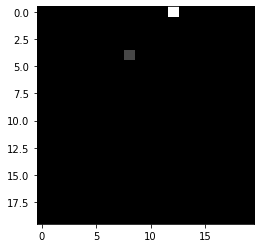

In [12]:
plt.imshow(example.reshape(20,20), cmap='gray')

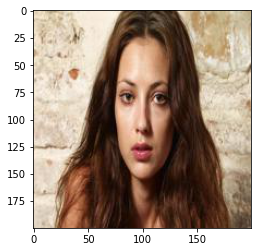

In [13]:
plt.imshow(x_test[3])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


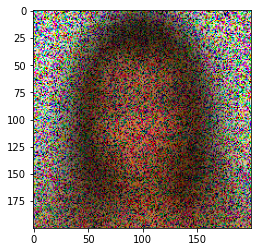

In [14]:
ae = autoencoder.predict([x_test[3].reshape(-1, 200, 200, 3)])[0]

plt.imshow(ae)